In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import stats
from scipy import stats
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols,logit,glm

In [2]:
df = pd.read_csv('./data/spstat1.csv', encoding='euc-kr',
                engine = 'python')
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


### 교차분석 ($x^2$ 검정, Chi-square)

* 교차분석은 독립변인과 종속변인이 모두 명목척도 혹은 서열척도로 측정한 불연속 변인일 때 적용하는 통계방법
* 관찰빈도($O$)와 기대빈도($E$, 또는 가설화된 빈도)를 비교하여 카이제곱값($x^2$)을 통해 통계적으로 검정
* 카이제곱값은 각 집단별 실제의 관찰값에서 원래의 기댓값을 빼고 그 값을 제곱한 후 그것을 기댓값으로 나눈 것들의 총합

$$ E= {(C*R) \over N} $$

$$ x^2= \sum {(O-E)^2 \over E} $$

* $C$: columns,  $R$: rows,  $N$: case의 총 합

* 질적자료와 질적자료간에 서로 통계적으로 관계가 있는지 판단하는 검정
* 카이제곱 분포를 기반으로 관찰된 빈도와 기대되는 빈도와 의미있게 다른지 여부를 검증
* https://junsik-hwang.tistory.com/23 참고

In [3]:
df.월수입

0      2
1      4
2      4
3      5
4      2
      ..
247    2
248    6
249    3
250    2
251    6
Name: 월수입, Length: 252, dtype: int64

* pd.crosstab(): 교차표(contingency table)를 만들어줌 / 범주형 변수를 기준으로 갯수파악이나 수치형 데이터를 넣어 계산할 때 사용

In [3]:
pd.crosstab(df['월수입'], df['사용브랜드'])

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [4]:
result = pd.crosstab(df.월수입, df.사용브랜드)
result

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [5]:
stats.chi2_contingency(observed = result)

# 카이제곱 값: 12.86516581745558
# p-value: 0.024675611662926037 < 0.05
# - 통계적으로 유의미한 차이가 있음: 귀무가설(H0)기각
# - 월수입에 따라 사용브랜드 차이가 있음
# - dof(자유도, degree of freedom): k-1 --> 5(=6-1)
# array: 기대치(Expected value)

(12.86516581745558,
 0.024675611662926037,
 5,
 array([[16.63095238, 16.36904762],
        [18.14285714, 17.85714286],
        [26.20634921, 25.79365079],
        [18.6468254 , 18.3531746 ],
        [20.15873016, 19.84126984],
        [27.21428571, 26.78571429]]))

### t-검정

* 독립변인이 불연속변인(명목,서열)이고 종속변인이 연속변인(등간,비율)일 때 사용하는데, 독립변인의 집단이 2개일 때만 적용
* 두 집단의 연속적인 변인의 평균값이 원래 기대했던 것과 실제 관찰된 값 사이의 관계를 통해 검정
* 두 집단 간 평균의 차이 대 집단 변화량 사이의 비율

$$ t = {두 집단 간 평균차이\over 집단의 변화량} $$ 

In [5]:
df['구매가격'].values

array([ 15,  20,  25,  26,  30,  30,  40,  40,  40,  40,  40,  45,  50,
        50,  50,  50,  50,  50,  50,  50,  50,  50,  60,  60,  60,  60,
        60,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  70,  72,  75,  75,  75,  80,  80,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  85,
        89,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  95,  99, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 130, 130, 130, 150,  10,  48,  50,
        50,  70,  70,  70,  70,  75,  80,  80,  80,  80,  89,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

In [6]:
mean = df['구매가격'].values

In [7]:
df['사용브랜드']

0      1
1      1
2      1
3      1
4      1
      ..
247    2
248    2
249    2
250    2
251    2
Name: 사용브랜드, Length: 252, dtype: int64

In [8]:
df[df['사용브랜드']==1]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,51,1,3,4,120,6,5,4,2,2,...,4,4,0,6,3,2,1,2,2,1
123,46,1,3,4,130,6,5,1,3,4,...,4,4,1,6,3,1,6,1,3,3
124,9,1,4,2,130,2,4,4,5,5,...,5,5,1,5,3,6,2,6,2,4
125,8,1,5,2,130,5,3,5,2,3,...,2,1,0,3,2,8,3,6,2,3


In [9]:
df[df['사용브랜드']==1].구매가격.values

array([ 15,  20,  25,  26,  30,  30,  40,  40,  40,  40,  40,  45,  50,
        50,  50,  50,  50,  50,  50,  50,  50,  50,  60,  60,  60,  60,
        60,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  70,  72,  75,  75,  75,  80,  80,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  85,
        89,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  95,  99, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 130, 130, 130, 150], dtype=int64)

In [10]:
mean1 = df[df['사용브랜드']==1].구매가격.values
mean2 = df[df['사용브랜드']==2].구매가격.values

C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


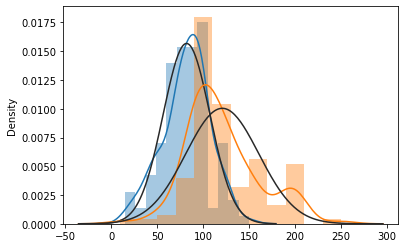

ShapiroResult(statistic=0.9720979928970337, pvalue=0.009973179548978806)

In [12]:
%matplotlib inline

sns.distplot(mean1, kde=True, fit=sp.stats.norm)
sns.distplot(mean2, kde=True, fit=sp.stats.norm)
plt.show()
sp.stats.shapiro(mean1)

kde: kernel density expectation (커널 밀도 추정)

Shapiro-Wilk Test on Normally Distributed Data (정규성 검정 테스트 )  
https://www.statology.org/shapiro-wilk-test-python/

In [13]:
sp.stats.levene(mean1, mean2)

# 레빈 테스트결과, 사용브랜드 간(두 집단) 등분산성 가정은 위배됨
# p-value가 0.0003 < 0.05 --> 등분산성 가정 위배
# H0: mean1, mean2 분산은 같다 (등분산)

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

In [14]:
# 독립 표본 t 검정 (등분산성 위배 조건)
stats.ttest_ind(mean1, mean2, equal_var=False)

# pvalue=3.598124628532717e-17 < 0.05 이므로, 두 집단 간 유의한 차이가 있음

Ttest_indResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17)

In [15]:
df.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

In [16]:
df['재구매의향']

0      3
1      3
2      2
3      5
4      3
      ..
247    3
248    3
249    4
250    3
251    3
Name: 재구매의향, Length: 252, dtype: int64

In [17]:
mean = df['재구매의향'].values
mean1 = df[df['사용브랜드'] == 1].재구매의향.values
mean2 = df[df['사용브랜드'] == 2].재구매의향.values

C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


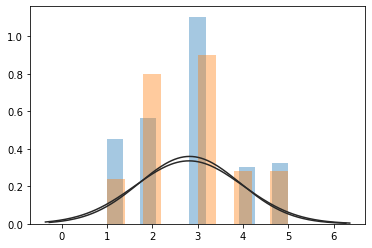

ShapiroResult(statistic=0.8974907994270325, pvalue=7.541181901160598e-08)

In [18]:
%matplotlib inline

sns.distplot(mean1, kde=False, fit=sp.stats.norm)
sns.distplot(mean2, kde=False, fit=sp.stats.norm)
plt.show()
sp.stats.shapiro(mean1)

# 귀무가설(H0) : 정규분표를 따른다.

In [19]:
sp.stats.levene(mean1, mean2)

# p-value=0.7315465812585951 > 0.05
# 귀무가설(등분산 가정 기각 못함 >> 가정 충족함)

LeveneResult(statistic=0.1179597504462619, pvalue=0.7315465812585951)

In [20]:
# independent 2 sample t_test
stats.ttest_ind(mean1, mean2, equal_var=True)  # 등분산 가정

# pvalue=0.9290258377820513 > 0.05
# 통계적으로 유의한 차이가 없음

Ttest_indResult(statistic=-0.0891603787635918, pvalue=0.9290258377820513)

### 분산분석 (ANOVA: Analysis of Variance)

* 3개 이상 다수의 집단을 비교할 때 사용하는 가설검정 방법  


* t-검정이나 분산분석(ANOVA:Analysis of Variance)은 종속변인이 연속변인이고 독립변인이 불연속변인일 때 적용하는 것은 동일  
but, t-검정은 독립변인의 집단이 2개, 분산분석은 3개 집단 이상일 때 적용


* 분산분석은 F값을 통해서 검정  
F값은 집단 간 분산과 집단 내 분산과의 관계를 통해 계산
* 집단 간 분산: 각 집단의 전체 평균에 대한 분산  
집단 내 분산: 각 집단 내에서 집단 내 평균에 대한 분산

$$ 총변동(SST) = 집단 간 변동(SSB) + 집단 내 변동(SSW) $$

- 총변동(총편차제곱)
$$ SST = {\sum_{i=1}^k} {\sum_{j=1}^m} {({y_{ij} - \bar y})^2} = SSB+SSW $$ 

* 집단간 변동(집단간 편차제곱)
$$ SSB = {\sum_{i=1}^k} {n_i} {(\bar y_i - \bar y)^2} $$

* 집단내 변동(집단내 편차제곱)
$$ SSW = {\sum_{i=1}^k} {\sum_{j=1}^m} {({y_{ij} - \bar y_i})^2} $$ 

* $$ {F통계량 =} {{{SSB}\over{df_b}} \over {{SSW}\over{df_w}}} = {{MSB}\over{MSW}}$$

* $df_b$ : 집단간 변화량의 자유도,    $   df_w$ : 집단내 변화량의 자유도

In [8]:
df

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2
249,98,2,5,1,200,2,3,2,4,3,...,2,1,0,3,2,6,4,3,2,2
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1


### 연령에 따른 재구매의향 차이

In [9]:
anova1 = df[df['연령2'] == 1].재구매의향.values
anova2 = df[df['연령2'] == 2].재구매의향.values
anova3 = df[df['연령2'] == 3].재구매의향.values

# 연령2 --> 세 집단으로 줄임 (요인분석한 결과값)

C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:>

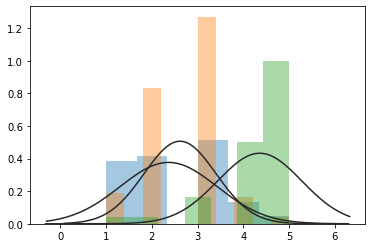

In [10]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm)
sns.distplot(anova2, kde=False, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)

In [12]:
stats.f_oneway(anova1, anova2, anova3)

# pvalue=1.613686022426391e-25 < 0.05
# 귀무가설(H0): 연령2의 세 집단간 재구매의향은 차이가 없다.
# 그러나, p-value가 0.05보다 작으므로
# 세 집단간 모두 차이가 없다고 말할 수 없다. >> 사후 테스트 필요

F_onewayResult(statistic=72.42612494637737, pvalue=1.613686022426391e-25)

차이가 있는 것으로 나타나면 구체적으로 어느 집단 사이에 차이가 있는가를 '사후테스트(post hoc test)'를 통해 밝혀야 한다.  
사후검정 방법: 투키(tukey), 본페로니(bonferroni), 셰페(scheffe) 등

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [14]:
tukey = pairwise_tukeyhsd(endog = df['재구매의향'],  # data
                         groups = df['연령2'],       # groups
                         alpha = 0.05)  # 유의수준(significance level)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.25,0.1275,-0.0526,0.5526,False
1,3,1.9905,0.001,1.5849,2.396,True
2,3,1.7405,0.001,1.3514,2.1295,True


mmandiff: 평균값의 차이  
p-adj: 조정된 p-value  
reject: 귀무가설을


* 결과해석  
1-3, 2-3 집단간 평균차이 존재: p-value = 0.001, 귀무가설 기각(reject=True)

C:\Users\jjunghu\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


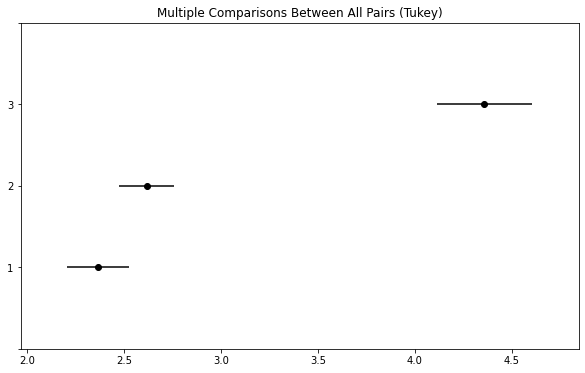

In [15]:
tukey.plot_simultaneous()
plt.vlines(x=49.57, ymin=-0.5, ymax=4.5, color='red')
plt.show()

### 연령에 따른 구매가격 차이

In [17]:
anova1 = df[df['연령2'] == 1].구매가격.values
anova2 = df[df['연령2'] == 2].구매가격.values
anova3 = df[df['연령2'] == 3].구매가격.values

# 연령2: 세 집단으로 줄임 (요인분석한 결과값)

In [19]:
stats.f_oneway(anova1, anova2, anova3)

# 일원분산분석 결과, f통계량은 0.8181036982598708 이고,
# pvalue=0.44245014422691564 > 0.05
# 세 집단간 유의한 차이가 없음

F_onewayResult(statistic=0.8181036982598708, pvalue=0.44245014422691564)

C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jjunghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

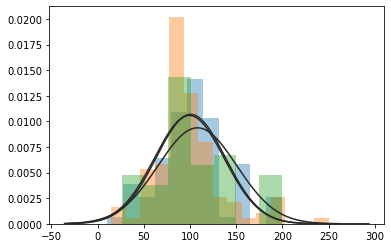

In [20]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm)
sns.distplot(anova2, kde=False, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)
plt.show()

### 상관분석

* 독립변인과 종속변인이 모두 연속변인일 때 서로 어느정도의 관련성이 있는가를 살펴볼 때 적용


* 가장 많이 사용하는 상관계수(correlation coefficient)는 피어슨r (Pearson's r) 값

$$ r = {{{\sum(Z_X Z_Y)} \over n}} $$


$$ Z_{X_i} = {{{X_i - M} \over SD}} $$


$Z_X , Z_Y$ : X와 Y의 표준화 점수(standardized score, 또는 Z-score)  
표준화 점수를 사용한 이유는 각 변인에 대한 척도가 다를 수 있기 때문에 척도를 표준화시켜주려는 것


$M$ : 변인 X의 평균, $SD$: 변인 X의 표준편차

* 상관관계를 분석할 때는 r값과 유의확률을 봄
* 상관계수 r값을 통해 변인 간 상관관계의 방향성과 강도를 알 수 있음  
r값이 양수(+)이면 한 변인의 값이 증가할 때 다른 변인의 값도 증가하는 긍정적인 상관관계이고,  
음수(-)이면 한 변인의 값이 증가할 때 다른 변인의 값은 감소하는 부정적 상관관계


$$ -1<r<1 $$

In [21]:
sp.stats.pearsonr(df.재구매의향, df.구입조언)

(0.4178362064881855, 4.546075388272514e-12)

In [22]:
corr = sp.stats.pearsonr(df.재구매의향, df.구입조언)
print('상관관계=%.2f, p-value=%.2f'%(corr))

상관관계=0.42, p-value=0.00


In [23]:
df.corr(method='pearson')

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
번호,1.000000,-0.047623,0.055364,-0.025606,-0.086080,-0.051147,-0.050270,0.016985,0.136440,0.078784,...,0.052534,-0.010902,-1.080086e-02,-0.038587,-3.437524e-03,-0.018785,0.014950,-0.201912,-0.155690,0.020283
사용브랜드,-0.047623,1.000000,0.015513,-0.009409,0.504192,-0.056471,-0.022794,-0.023418,-0.086466,-0.048290,...,-0.319646,-0.268644,7.936758e-03,0.035986,2.056873e-02,0.015688,0.078505,0.000946,0.011505,-0.012989
사용기간,0.055364,0.015513,1.000000,-0.033291,0.055694,-0.041385,0.163995,-0.031484,0.364656,0.275456,...,0.049501,-0.070494,2.095292e-02,0.289194,2.802837e-01,0.135625,-0.067558,0.170708,0.200593,-0.031246
구매장소,-0.025606,-0.009409,-0.033291,1.000000,0.000500,0.154155,0.129688,0.096426,-0.112618,-0.101271,...,-0.015530,-0.003555,1.116104e-01,0.063064,3.949891e-02,0.005582,0.052707,-0.052339,-0.025227,-0.125619
구매가격,-0.086080,0.504192,0.055694,0.000500,1.000000,0.036478,0.166607,0.162502,0.016474,0.121168,...,-0.061142,-0.089322,5.441430e-02,0.026217,4.756285e-02,0.102732,-0.021546,0.140954,0.010288,0.031466
정보획득,-0.051147,-0.056471,-0.041385,0.154155,0.036478,1.000000,0.044041,0.036552,-0.109654,0.001379,...,0.031857,0.084373,2.084692e-01,-0.028481,-5.093567e-02,-0.030649,0.040337,0.024921,-0.008287,0.110201
구입조언,-0.050270,-0.022794,0.163995,0.129688,0.166607,0.044041,1.000000,0.152128,0.255051,0.365651,...,0.315692,0.199148,9.656477e-02,0.623919,6.405167e-01,0.202405,-0.178018,0.203266,0.243664,-0.011434
하루사용시간,0.016985,-0.023418,-0.031484,0.096426,0.162502,0.036552,0.152128,1.000000,-0.045647,0.050846,...,0.019810,0.010031,-6.277929e-02,0.033098,2.471600e-02,0.225983,0.023726,0.107988,-0.087184,0.085902
브랜드이미지,0.136440,-0.086466,0.364656,-0.112618,0.016474,-0.109654,0.255051,-0.045647,1.000000,0.512966,...,0.240870,0.141335,-7.046798e-03,0.300457,3.383337e-01,0.089793,-0.023346,0.113624,0.121006,0.029519
가격만족도,0.078784,-0.048290,0.275456,-0.101271,0.121168,0.001379,0.365651,0.050846,0.512966,1.000000,...,0.283316,0.218231,-8.536627e-02,0.494699,5.186812e-01,0.057481,0.015575,0.137864,0.307197,0.079693


### 회귀분석

* 독립변인과 종속변인이 모두 연속변인일 때 적용하는 통계분석 기법  
독립변인x와 종속변인y 사이의 인과관계를 예측
* 변인들이 불연속변인인 경우에는 0과 1의 두 값을 가진 가변인(dummy variable)으로 변환하여 연속변인인 것처럼 간주하여 분석


* '상관관계'에서는 여려 변인들 사이의 상관관계를 규명하는 것이기 때문에 인과성을 따지기 어려워 무엇이 독립변인이고 종속변인인가를 정하지 않는다. 즉 두 변인이 함께 변화하는 정도를 나타낸 것이며, 상관계수 r도 두 변인이 공통으로 갖고 있는 변량을 지수화한 것

* 하나(혹은 여러 개)의 변인이 특정값을 가질 때 그것과 관계있는 다른 변인의 값을 예측하고자 할 때 '회귀분석'을 적용  
즉, '회귀분석'은 하나 혹은 여러 독립변인이 하나의 종속변인에 어떤 영향을 미치는지 그 인과관계를 규명

In [24]:
ols(formula = '재구매의향 ~ 성별+연령+학력+월수입+사용기간+구매가격+\
        구입조언+브랜드이미지+가격만족도+구매중요도1_메모리+하루사용시간',
       data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     51.44
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           7.46e-57
Time:                        17:16:34   Log-Likelihood:                -240.30
No. Observations:                 252   AIC:                             504.6
Df Residuals:                     240   BIC:                             547.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1580      0.226     -0.699      0.485      -0.603       0.287
성별             0.0573      0.085      0.672      0.502      -0.111       0.225
연령             0.0503      0.047      1.071      0.285      -0.042       0.143
학력             0.0062      0.025      0.246      0.806      -0.043       0.056
월수입           -0.0368      0.027     -1.372      0.171      -0.090       0.016
사용기간           0.1292      0.034      3.807      0.000       0.062       0.196
구매가격        3.583e-06      0.001      0.003      0.997      -0.002       0.002
구입조언           0.1206      0.049      2.459      0.015       0.024       0.217
브랜드이미지         0.4527      0.044     10.261      0.000       0.366       0.540
가격만족도          0.3961      0.052      7.626      0.000       0.294       0.498
구매중요도1_메모리    -0.0426      0.028     -1.538      0.125      -0.097       0.012
하루사용시간        -0.0010      0.031     -0.033      0.974      -0.062       0.060
==============================================================================
Omnibus:                        4.865   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.345
Skew:                          -0.249   Prob(JB):                        0.114
Kurtosis:                       2.592   Cond. No.                         611.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 mi

C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jjunghu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44396 missing from

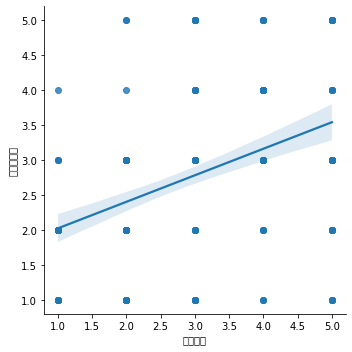

In [26]:
sns.lmplot(y='재구매의향', x='사용기간', data=df)